In [1]:
from os import listdir
import os
import PIL
from PIL import Image
import math
from collections import defaultdict
from matplotlib.pyplot import imshow
import numpy as np
import numpy.matlib
import scipy.misc
from scipy.misc import imsave
%matplotlib inline

In [2]:
raw_dir = '/ssd/catwong/cartoonnetwork/'

In [3]:
### Goal: get the first real face for each celebrity

real_faces_dir = 'canonical'
real_faces = listdir(os.path.join(raw_dir, real_faces_dir))

all_celebrities = set([path[:-6] for path in real_faces if '.DS' not in path])

celebrity_to_photos = defaultdict(list)
for photo_file in real_faces:
    celeb = photo_file[:-6]
    celebrity_to_photos[celeb] += [os.path.join(raw_dir, real_faces_dir, photo_file)]

print all_celebrities
print celebrity_to_photos['KimJongUn']

set(['JayLeno', 'RobertDowneyJr', 'JackieChan', 'NelsonMandela', 'Oprah', 'AngelaMerkel', 'beyonce', 'TigerWoods', 'MattDamon', 'Rihanna', 'RowanAtkinson', 'JohnLennon', 'PeterJackson', 'DwayneJohnson', 'AlbertEinstein', 'HughJackman', 'Federer', 'BruceWillis', 'BarackObama', 'DanielRadcliffe', 'che', 'LeonardoDiCaprio', 'ScarlettJohansson', 'MichaelJordan', 'NicoleKidman', 'AbrahamLincoln', 'JustinBieber', 'VladimirPutin', 'PrincessDiana', 'pele', 'BillClinton', 'BradPitt', 'MorganFreeman', 'AngelinaJolie', 'JohnFKennedy', 'PrinceCharles', 'KimJongUn', 'hillaryclinton', 'QuentinTarantino', 'MLK', 'SteveJobs', 'MarkZuckerberg', 'JayZ', 'RussellCrowe', 'Gandhi', 'MalcolmX', 'ElvisPresley', 'MeganFox', 'TomCruise', 'JKRowling', 'MarilynMonroe', 'BillGates', 'PabloPicasso', 'GeorgeClooney', 'DalaiLama', 'SylvesterStallone', 'MilaKunis', 'PaulMccartney', 'lucilleball', 'SelenaGomez', 'Shakira', 'BritneySpears', 'ArnoldSchwarzenegger', 'AishwaryaRai', 'JimCarrey', 'DanielCraig', 'EmmaWatson

In [4]:
# Create pairs of real photos with each cartoon
cartoons_dir = 'good_caricatures'
caricatures = listdir(os.path.join(raw_dir, cartoons_dir))
celebrity_to_caricatures = defaultdict(list)

for photo_file in caricatures:
    celeb = photo_file.split("_")[0]
    celebrity_to_caricatures[celeb] += [os.path.join(raw_dir, cartoons_dir, photo_file)]


cartoons = [path for path in listdir(os.path.join(raw_dir, cartoons_dir)) if '.jpeg' in path]
real_cartoon_pairs = defaultdict(list)
all_celebrities = set([path.split("_")[0] for path in real_faces])
for cartoon in cartoons:
    celebrity = cartoon[:-9]
    full_cartoon_path = os.path.join(raw_dir, cartoons_dir, cartoon)
    real_cartoon_pairs[celebrity].append((celebrity_to_real_photo[celebrity], full_cartoon_path))

JayLeno
RobertDowneyJr
JackieChan
NelsonMandela
Oprah
AngelaMerkel
beyonce
TigerWoods
MattDamon
Rihanna
RowanAtkinson
JohnLennon
PeterJackson
DwayneJohnson
AlbertEinstein
HughJackman
Federer
BruceWillis
BarackObama
DanielRadcliffe
che
LeonardoDiCaprio
ScarlettJohansson
MichaelJordan
NicoleKidman
AbrahamLincoln
JustinBieber
VladimirPutin
PrincessDiana
pele
BillClinton
BradPitt
MorganFreeman
AngelinaJolie
JohnFKennedy
PrinceCharles
KimJongUn
hillaryclinton
QuentinTarantino
MLK
SteveJobs
MarkZuckerberg
JayZ
RussellCrowe
Gandhi
MalcolmX
ElvisPresley
MeganFox
TomCruise
JKRowling
MarilynMonroe
BillGates
PabloPicasso
GeorgeClooney
DalaiLama
SylvesterStallone
MilaKunis
PaulMccartney
lucilleball
SelenaGomez
Shakira
BritneySpears
ArnoldSchwarzenegger
Unable to do: concatenated_ArnoldSchwarzenegger1.jpg
AishwaryaRai
JimCarrey
DanielCraig
EmmaWatson


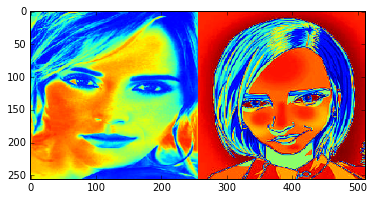

In [11]:
base_dir = '/ssd/catwong/cartoonnetwork/paired_dataset_2'
for celeb_index, celebrity in enumerate(all_celebrities):
    print celebrity
    if celeb_index < 55:
        continue
        split_dir = 'train'
    elif celeb_index < 62:
        split_dir = 'val'
    else:
        split_dir = 'test'
    # Create the pairs
    i = 0
    for real_path in celebrity_to_photos[celebrity]:
        targets = [celebrity_to_caricatures[celebrity][2]]
        #targets = celebrity_to_caricatures[celebrity] if split_dir = 'train' else [celebrity_to_caricatures[celebrity][0]]
        for cartoon_path in targets:
            try:
                real_img = Image.open(real_path)
                resized_real = real_img.resize((256, 256)).convert('L')
                cartoon_img = Image.open(cartoon_path)
                resized_cartoon = cartoon_img.resize((256, 256)).convert('L')

                resized_real = np.array(resized_real)
                resized_cartoon = np.array(resized_cartoon)

                # Concatenate the two
                concatenated = np.hstack((resized_real, resized_cartoon))

                imshow(concatenated)
                # Save the image
                new_name = "concatenated_" + celebrity + str(i) + ".jpg"
                imsave(os.path.join(base_dir, split_dir, new_name), concatenated)
                i += 1
            except:
                print "Unable to do: " + new_name
        

In [6]:
# Stack all the images so that they're still 256x3
base_dir = '/ssd/catwong/cartoonnetwork/paired_dataset_2'
new_base_dir = '/ssd/catwong/cartoonnetwork/paired_dataset_2'
sub_dirs = ['val', 'test']
i = 0
for sub_dir in sub_dirs:
    print sub_dir
    image_files = os.listdir(os.path.join(base_dir, sub_dir))
    for image_file in image_files:
        if i % 500 == 0:
            print "Now on: " + str(i)
        # Get the full image path
        image_file_full = os.path.join(base_dir, sub_dir, image_file)
        img = Image.open(image_file_full)
        img = np.array(img)
        # Create a three layer stacked image
        img = np.dstack((img, img, img))
        imsave(os.path.join(new_base_dir, sub_dir, image_file), img)
        i += 1




val
Now on: 0
test


In [21]:
test = Image.open('/ssd/catwong/cartoonnetwork/paired_dataset_v2/test/concatenated_JimCarrey9.jpg')
print np.array(test).shape

(256, 512, 3)
